# House Price Prediction Using Advanced Regression Ridge Lasso


## Problem Statement



A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house?? 

How well those variables describe the price of a house. Also,

Determine the optimal value of lambda for ridge and lasso regression.



## Business Goal


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#Suppress Warnings throughout
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Load the input data CSV to read data

In [3]:
housing_data = pd.read_csv("C:\\Upgrad\\House Price Prediction Assignment\\train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Fetching the info shape and also check if there are null columns

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are maximum non-null columns and have types of int64 and object and very less null columns so we will continue to consider them for our further analysis

In [5]:
housing_data.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

Find the total number of rows and columns from the data set

In [6]:
housing_data.shape

(1460, 81)

Find the percentile mean, count, and max values from the data set to analyse the data for further analysis.

In [7]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Exploratory data analysis

Finding all NaN values in categorical attributes from the given dataset

In [8]:
housing_data.select_dtypes(include='object').isnull().sum()[housing_data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Above results shows the null value columns and these should be replaced from null values with a more meaningful value. The null values NA shall be replaced with value None for further meaningful analysis

In [9]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housing_data[col] = housing_data[col].fillna('None')

Categorical columns analysis - If there is any categorical column which has the same value associated with a column, we could drop the column as it would not provide any valuable input for the model. 

Implementing a function to determine the percentage of such values for each column and we take a decision whether to drop it. The cut-off that is considered to be 85%. 

In [10]:
def removeRedundantCategoricalColumns():
    columns = []
    categorical_variables = housing_data.select_dtypes(include=['object'])
    for col in (categorical_variables):
        if(housing_data[col].value_counts().max() >= 1241):
            columns.append(col)
    return columns

columnsForRemoval = removeRedundantCategoricalColumns()

# Remove the columns with skewed data

housing_data.drop(columnsForRemoval, axis = 1, inplace = True)

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


Find out, if there are any null values in categorical columns

In [11]:
housing_data.select_dtypes(include='object').isnull().sum()[housing_data.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

Above output confirms there are no more null values for categorical variables

Now, lets continue to check for null values from numerical variables and see if it needs to be removed

In [12]:
housing_data.select_dtypes(include=['int64','float']).isnull().sum()[housing_data.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

For the columns LotFrontage and MasVnrArea we shall replace the null values with the median value for more meaningful analysis.

In [13]:
housing_data['LotFrontage'] = housing_data['LotFrontage'].replace(np.nan, housing_data['LotFrontage'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].replace(np.nan, housing_data['MasVnrArea'].median())

For the column GarageYrBuilt first let us replace the null values to 0 and then convert values to binary. 

Let us introduce a new column, if the GarageYrBuilt is less than 2000 then let us replace the value with 0 and if its greater than 1 lets replace it with 1. 

The null values are replaced with 0 and hence these are considered as built in the year before 2000 only

In [14]:
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(0)
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].astype(int)

In [15]:
def garageConstrctnYr(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing_data['newGarage'] = housing_data['GarageYrBlt'].apply(garageConstrctnYr)
housing_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,newGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,1


YeahBuilt & Rennovated Analysis - For finding building age

In the next steps let us add some new columns to determine some of the parameters for the house.
In the first step a new column 'Rennovated' is added to check if the house is rennovated or not. The values are set accordingly

1) 0--if the year rennovated and year built are the same
2) 1--if the year built is lesser than the rennovated year

In [16]:
def isRennovated(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_data['Remodelled'] = housing_data.apply(isRennovated, axis=1)
housing_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,newGarage,Remodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,1,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,0,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,1,0


In the next step we shall add one more column to determine the age of the building during the time of selling

In [17]:
def getBuiltYear(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing_data['BuiltRemodelAge'] = housing_data.apply(getBuiltYear, axis=1)
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,newGarage,Remodelled,BuiltRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,1,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,0,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,1,0,8


Now that new columns are built for certain columns with more meaningul data we can drop the origincal columns

In [18]:
housing_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In the next step we are going to remove the variables which have the same value associated with a numerical variable.
In the same way that we did for categorical variables here also we take the cut off percentage as 85% and remove the variable if more than 85% of the value is associated

In [19]:
def HighNumericalCounts():
    columns = []
    numerical_columns = housing_data.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housing_data[col].value_counts().max() >= 1241):
            columns.append(col)
    return columns

columnsToBeRemoved = HighNumericalCounts()
housing_data.drop(columnsToBeRemoved, axis = 1, inplace = True)

housing_data.drop(['MoSold'], axis = 1, inplace = True)

housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,newGarage,Remodelled,BuiltRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,1,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,0,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,1,0,8


Null value Columns Analysis

Now let us check the percentage of null values in each column

In [20]:
Missing_Values = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
print(Missing_Values)

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage        0.0
LotArea            0.0
LotShape           0.0
LotConfig          0.0
Neighborhood       0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
RoofStyle          0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         0.0
MasVnrArea         0.0
ExterQual          0.0
Foundation         0.0
BsmtQual           0.0
BsmtExposure       0.0
BsmtFinType1       0.0
BsmtFinSF1         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
HeatingQC          0.0
1stFlrSF           0.0
2ndFlrSF           0.0
GrLivArea          0.0
BsmtFullBath       0.0
FullBath           0.0
HalfBath           0.0
BedroomAbvGr       0.0
KitchenQual        0.0
TotRmsAbvGrd       0.0
Fireplaces         0.0
FireplaceQu        0.0
GarageType         0.0
GarageFinish       0.0
GarageCars         0.0
GarageArea         0.0
WoodDeckSF         0.0
OpenPorchSF        0.0
Fence      

Duplicate Values Analysis

As we can see from the above data,

There are no more numerical variables also which has null values
Before we proceed with further analysis,

Now, let us check if there are any duplicates in the data set. 

In [21]:
housing_data[housing_data.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,newGarage,Remodelled,BuiltRemodelAge


There are no duplicate columns as well. The data looks good to proceed for further analysis 

Outliers Analysis

Next let us check if there are outliers in the dataset for numerical columns

In [22]:
housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,newGarage,Remodelled,BuiltRemodelAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.275342,0.476712,22.950000
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.446840,0.499629,20.640653
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,0.000000,4.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,0.000000,14.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,1.000000,41.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,1.000000,56.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,1.000000,58.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,1.000000,60.000000


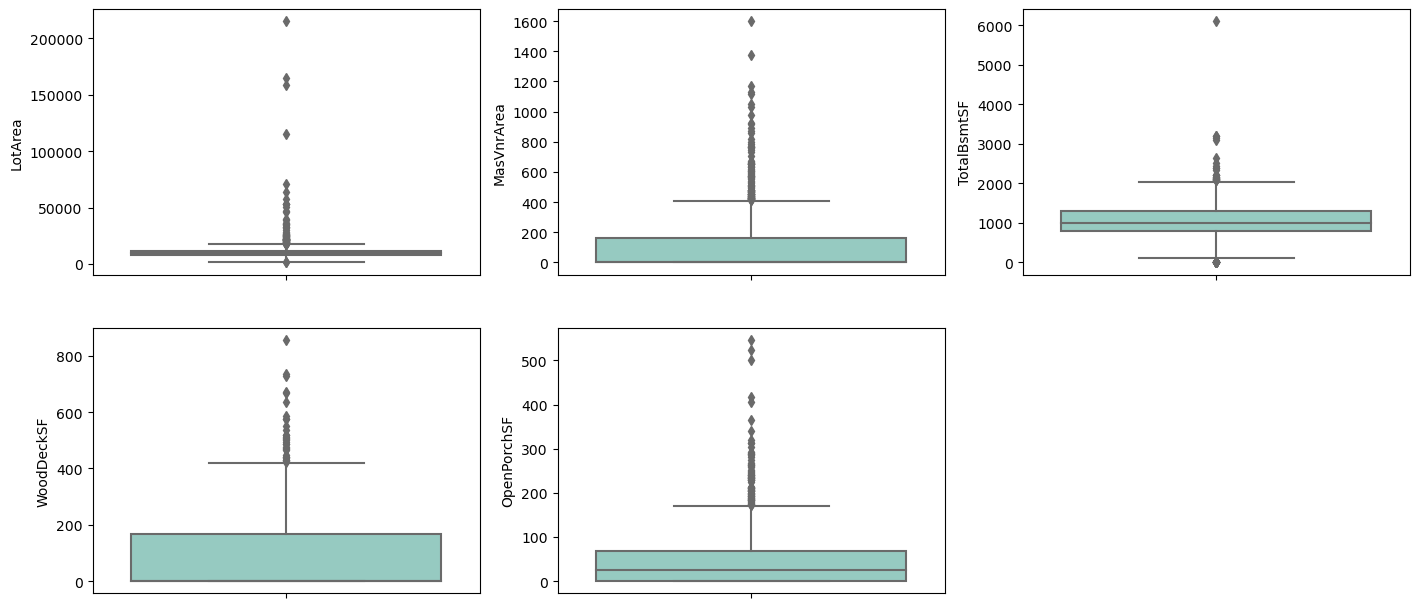

In [23]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing_data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing_data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing_data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing_data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing_data)
plt.show()

As per the graph above there are outliers with all of the above numerical variables. These must be removed. Let us remove data above the 99% quartile for the numerical variables above

After removing the outliers let us also check the percentage of originial data retained

In [24]:
quartile_LotArea = housing_data['LotArea'].quantile(0.98)
housing_data = housing_data[housing_data["LotArea"] < quartile_LotArea]

quartile_MasVnrArea = housing_data['MasVnrArea'].quantile(0.98)
housing_data = housing_data[housing_data["MasVnrArea"] < quartile_MasVnrArea]

quartile_TotalBsmtSF = housing_data['TotalBsmtSF'].quantile(0.99)
housing_data = housing_data[housing_data["TotalBsmtSF"] < quartile_TotalBsmtSF]

quartile_WoodDeckSF = housing_data['WoodDeckSF'].quantile(0.99)
housing_data = housing_data[housing_data["WoodDeckSF"] < quartile_WoodDeckSF]

quartile_OpenPorchSF = housing_data['OpenPorchSF'].quantile(0.99)
housing_data = housing_data[housing_data["OpenPorchSF"] < quartile_OpenPorchSF]

In [25]:
numerical_data = round(100*(len(housing_data)/1460),2)
print(numerical_data)

93.01


### Data Visualisation

Let us visualize the target variable using a histogram

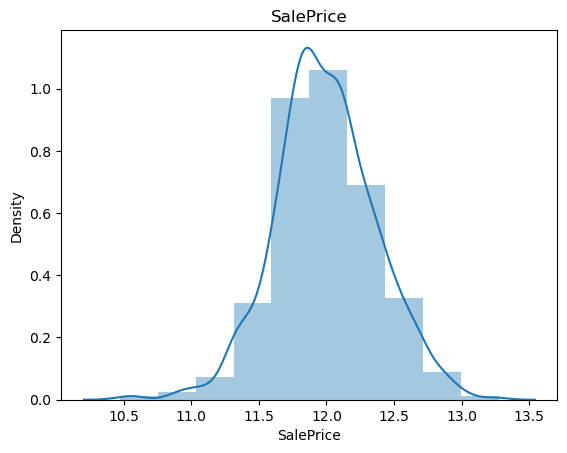

In [26]:
housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_data['SalePrice'], bins=10)
plt.show()

As we can see from the above graph the error terms are almost normally distributed with some disturbances. For now we could continue with the analysis

In the next step let us plot some pairplots with the target variable SalesPrice

<Figure size 1000x500 with 0 Axes>

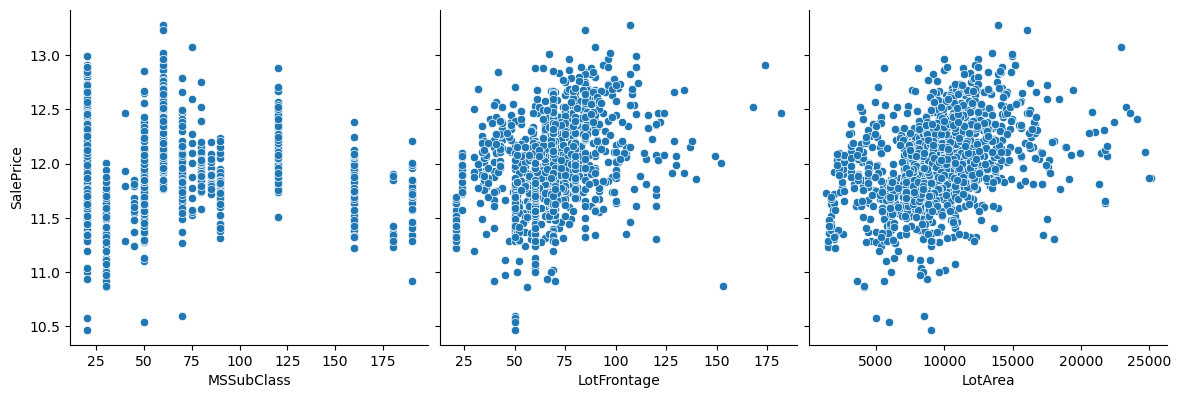

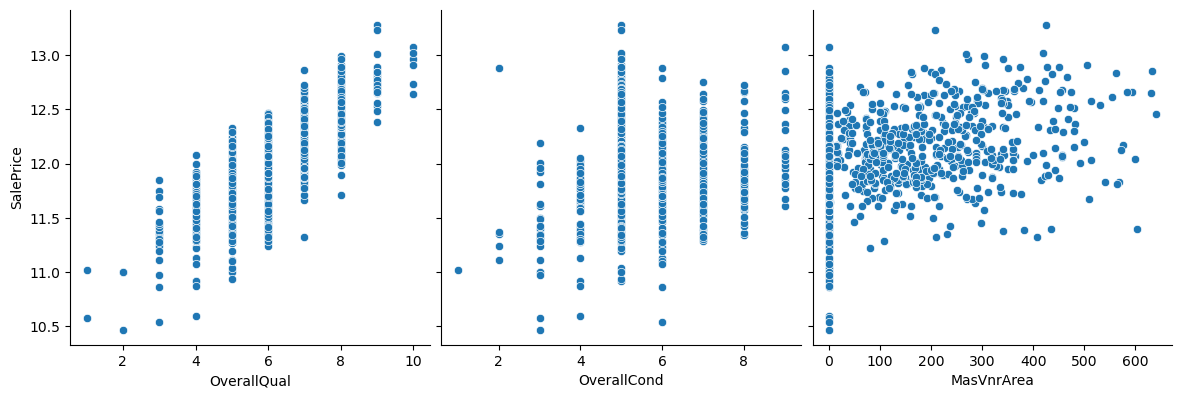

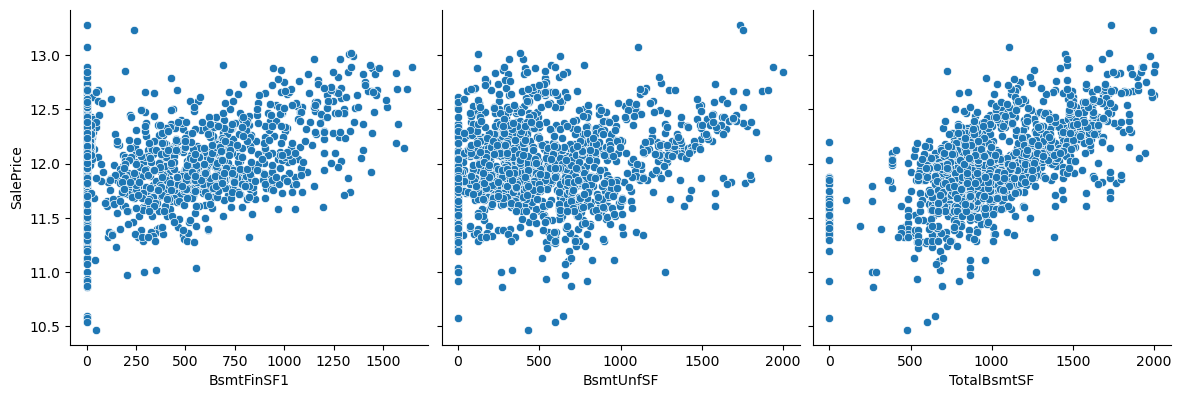

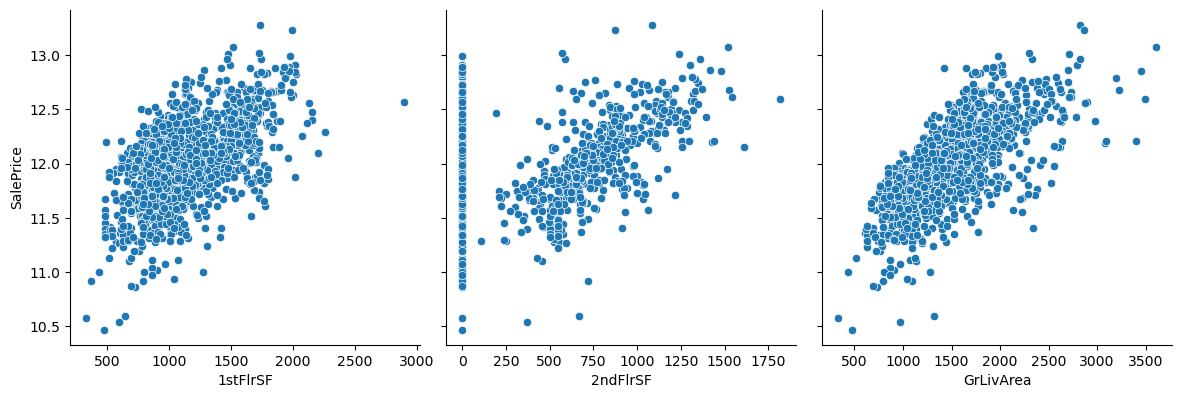

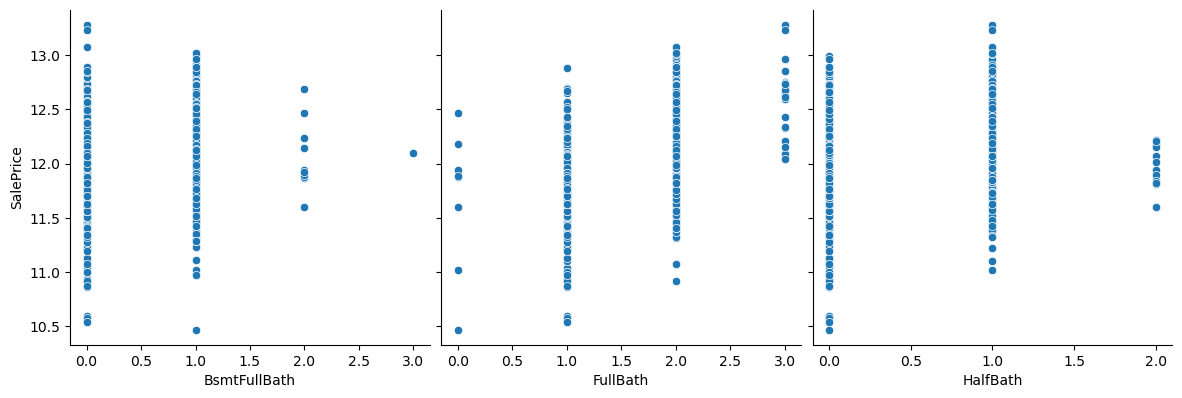

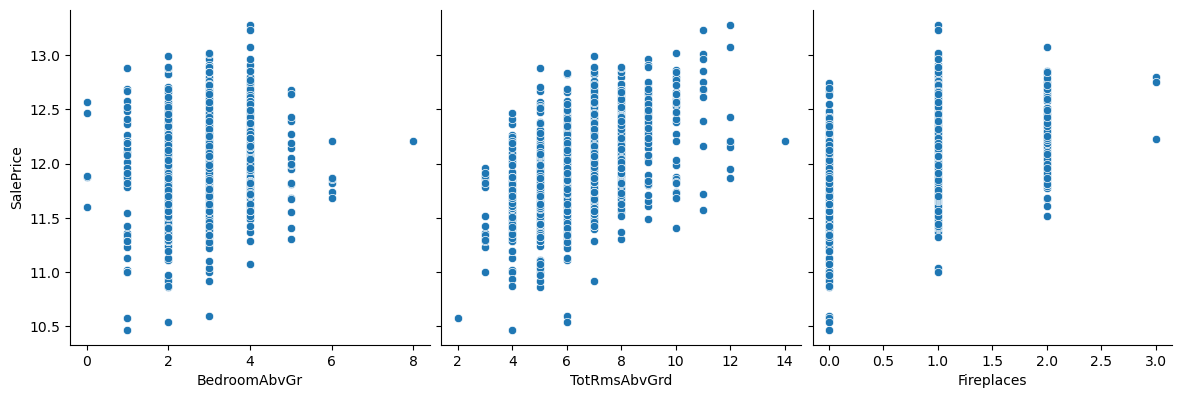

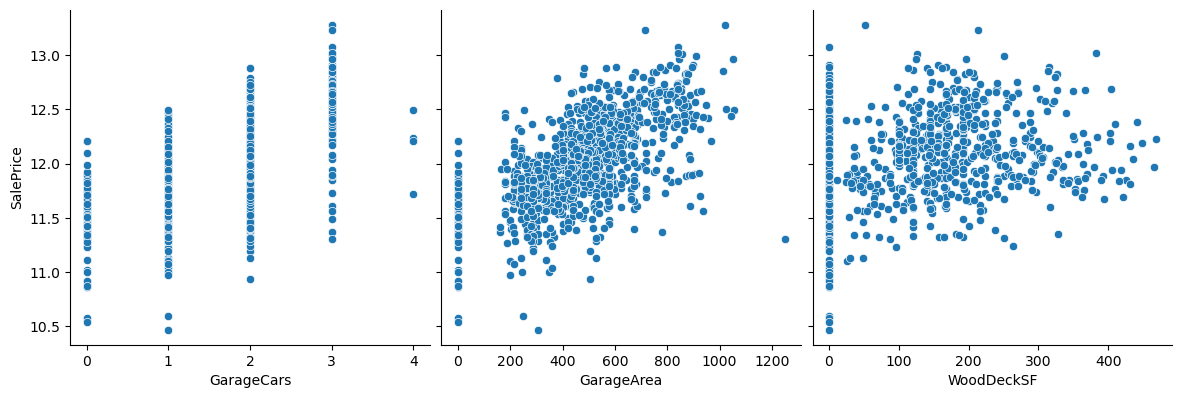

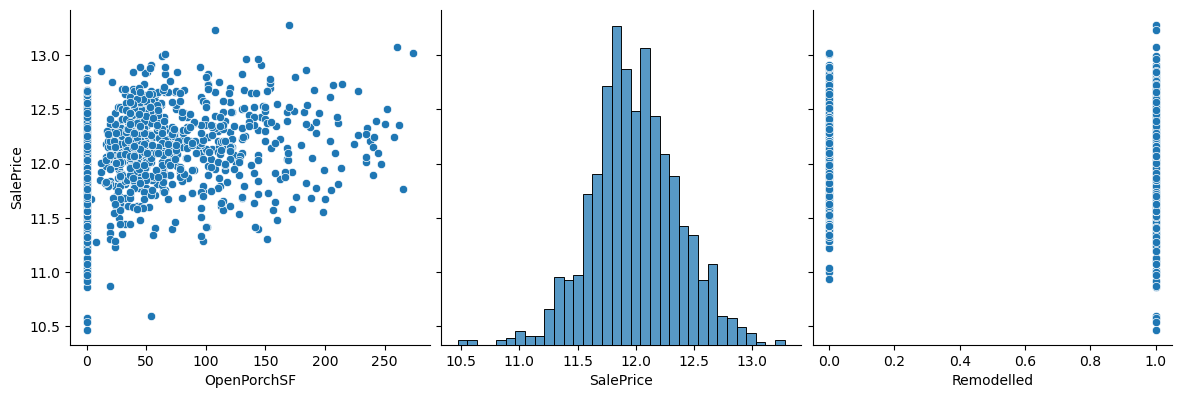

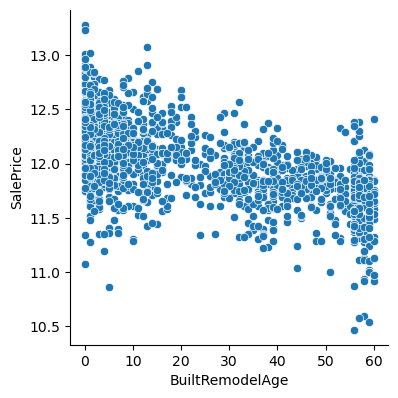

In [27]:
plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OpenPorchSF','SalePrice', 'Remodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BuiltRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

The columns 1stFlrSF, GrLivArea seems to be showing correlation towards right - Rest of the variables are too scattered and hence can be understood during further analysis

In the next step let us  plot a correlation graph and check the coreelation between the numerical variables

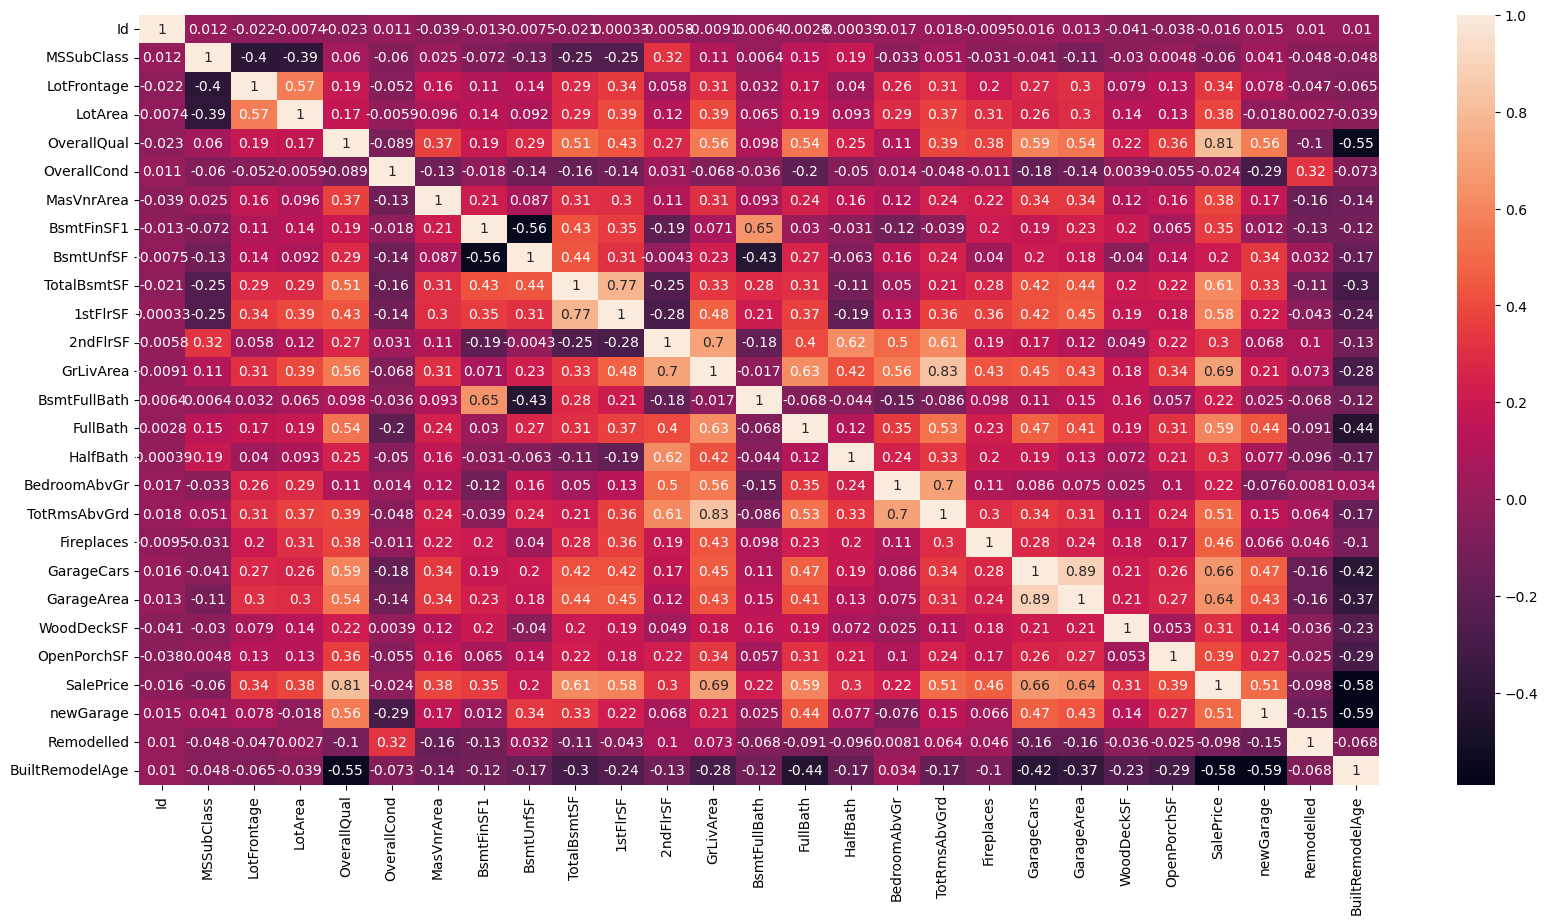

In [28]:
plt.figure(figsize = (20, 10))
sns.heatmap(housing_data.corr(), annot = True)
plt.show()

From the graph above we can see that there is a high correlation between - TotRmsAbvGrd and GrLivArea which show 82%
and Garage Area and Garage Cars show 88%. Lets drop these columns accordingly.

In [29]:
housing_data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [30]:
housing_data.shape

(1358, 47)

### Data Preperation

Converting categorical data into numercal data & creating Dummies

In [31]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

housing_data['d_LotShape'] = housing_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_data['d_ExterQual'] = housing_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_data['d_BsmtQual'] = housing_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_BsmtExposure'] = housing_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_data['d_BsmtFinType1'] = housing_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housing_data['d_HeatingQC'] = housing_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_KitchenQual'] = housing_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_FireplaceQu'] = housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['d_GarageFinish'] = housing_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_data['d_BldgType'] = housing_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housing_data['d_HouseStyle'] = housing_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_data['d_Fence'] = housing_data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing_data['d_LotConfig'] = housing_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housing_data['d_MasVnrType'] = housing_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_data['d_SaleCondition'] = housing_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


Drop the old columns from which the new columns were derived and we can also drop the id column as it will not be used any more

In [32]:
housing_data = housing_data.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


Creating dummies for the columns

In [33]:
# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housing_data['MSZoning'], prefix='MSZoning', drop_first = True)
housing_data = pd.concat([housing_data, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housing_data['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_data = pd.concat([housing_data, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housing_data['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_data = pd.concat([housing_data, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housing_data['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_data = pd.concat([housing_data, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housing_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_data = pd.concat([housing_data, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housing_data['Foundation'], prefix='Foundation', drop_first = True)
housing_data = pd.concat([housing_data, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housing_data['GarageType'], prefix='GarageType', drop_first = True)
housing_data = pd.concat([housing_data, d_GarageType], axis = 1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


Drop the below columns as we now have new columns derived from these columns


In [34]:
housing_data = housing_data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


### Train Test Split

In [35]:
# Putting all feature variable to X

X = housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [36]:
# Putting response variable to y

y = housing_data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

Scaling the features

In [37]:
from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [38]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

### Recursive feature elimination

Since there are around 111 features, we will use RFE to get the best 50 features out of the 111 features and use the new
features for further analysis

In [39]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=50)          
rfe = rfe.fit(X_train, y_train)

In [40]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [41]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [42]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### Model Building and Evaluation

### Ridge

In [43]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
17,6.0,-0.078265,-0.084389,1
16,5.0,-0.078223,-0.084389,2
18,7.0,-0.078310,-0.084389,3
19,8.0,-0.078358,-0.084390,4
20,9.0,-0.078403,-0.084391,5
21,10.0,-0.078446,-0.084397,6
15,4.0,-0.078183,-0.084422,7
14,3.0,-0.078147,-0.084500,8
22,20,-0.078804,-0.084528,9
13,2.0,-0.078114,-0.084601,10


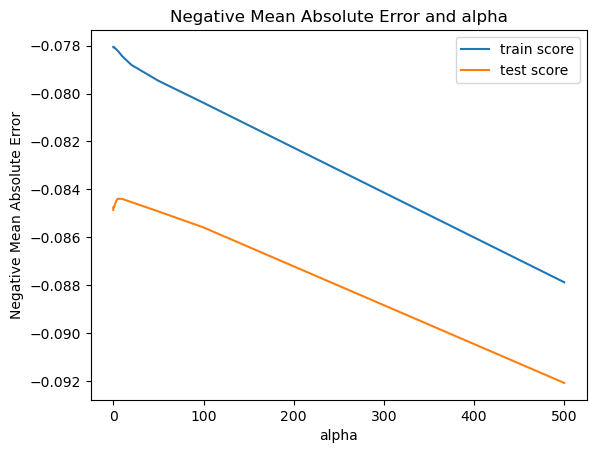

In [45]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [46]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=6.0)

In [47]:
# check the coefficient values with lambda = 6

alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.00508887,  0.02397052,  0.06775761,  0.04636578,  0.02580179,
       -0.00839001,  0.05291753,  0.10023286,  0.01114648,  0.01423495,
        0.02025849,  0.02381875,  0.03654837,  0.01409956, -0.01246891,
       -0.01996145,  0.01468606,  0.01804996,  0.01838453,  0.01528975,
        0.01655404, -0.01668624,  0.01431895,  0.06499261,  0.02704882,
        0.10294341,  0.07321305,  0.02452927, -0.01160282, -0.00703206,
       -0.00814379, -0.00657365,  0.02258583, -0.01457512, -0.00994826,
        0.01758098, -0.0094646 , -0.01345963,  0.01155638, -0.04012754,
       -0.02969878,  0.01275808, -0.01568388,  0.03448573,  0.01899535,
        0.02177266,  0.04503757,  0.01817262,  0.0069204 , -0.00965852])

In [48]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013698622121799814

In [49]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0051
1,LotArea,0.0240
2,OverallQual,0.0678
3,OverallCond,0.0464
4,BsmtFinSF1,0.0258
5,BsmtUnfSF,-0.0084
6,TotalBsmtSF,0.0529
7,GrLivArea,0.1002
8,BsmtFullBath,0.0111
9,FullBath,0.0142


In [50]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0051,
 'LotArea': 0.024,
 'OverallQual': 0.0678,
 'OverallCond': 0.0464,
 'BsmtFinSF1': 0.0258,
 'BsmtUnfSF': -0.0084,
 'TotalBsmtSF': 0.0529,
 'GrLivArea': 0.1002,
 'BsmtFullBath': 0.0111,
 'FullBath': 0.0142,
 'HalfBath': 0.0203,
 'Fireplaces': 0.0238,
 'GarageCars': 0.0365,
 'newGarage': 0.0141,
 'Remodelled': -0.0125,
 'BuiltRemodelAge': -0.02,
 'd_BsmtQual': 0.0147,
 'd_BsmtExposure': 0.018,
 'd_HeatingQC': 0.0184,
 'd_KitchenQual': 0.0153,
 'd_GarageFinish': 0.0166,
 'd_BldgType': -0.0167,
 'd_SaleCondition': 0.0143,
 'MSZoning_FV': 0.065,
 'MSZoning_RH': 0.027,
 'MSZoning_RL': 0.1029,
 'MSZoning_RM': 0.0732,
 'Neighborhood_Crawfor': 0.0245,
 'Neighborhood_Edwards': -0.0116,
 'Neighborhood_Gilbert': -0.007,
 'Neighborhood_MeadowV': -0.0081,
 'Neighborhood_NWAmes': -0.0066,
 'Neighborhood_NridgHt': 0.0226,
 'Neighborhood_OldTown': -0.0146,
 'Neighborhood_SWISU': -0.0099,
 'Neighborhood_StoneBr': 0.0176,
 'Exterior1st_BrkComm': -0.0095,
 'Exterior1st_CemntBd': -0.

In [51]:
##RFE

# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [52]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.1029
5,GrLivArea,True,1,0.1002
11,MSZoning_RM,True,1,0.0732
1,OverallQual,True,1,0.0678
9,MSZoning_FV,True,1,0.0650
4,TotalBsmtSF,True,1,0.0529
2,OverallCond,True,1,0.0464
14,Foundation_PConc,True,1,0.0450
7,GarageCars,True,1,0.0365
3,BsmtFinSF1,True,1,0.0258


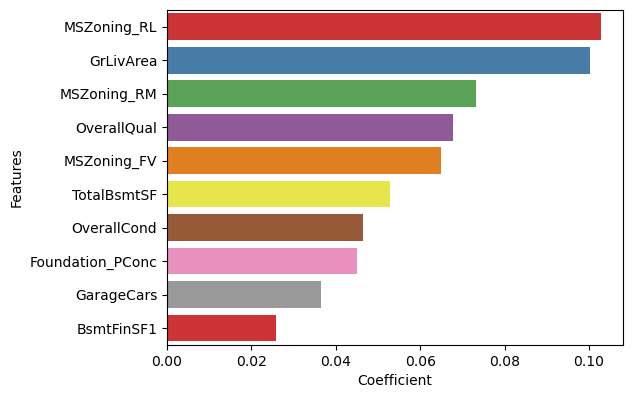

In [53]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

### Lasso

In [54]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.078320,-0.084591,1
4,0.0005,-0.078465,-0.084618,2
2,0.0003,-0.078223,-0.084676,3
1,0.0002,-0.078149,-0.084741,4
0,0.0001,-0.078097,-0.084812,5
5,0.001,-0.079219,-0.085164,6
6,0.002,-0.080115,-0.085693,7
7,0.003,-0.080671,-0.085992,8
8,0.004,-0.081144,-0.086458,9
9,0.005,-0.081681,-0.086941,10


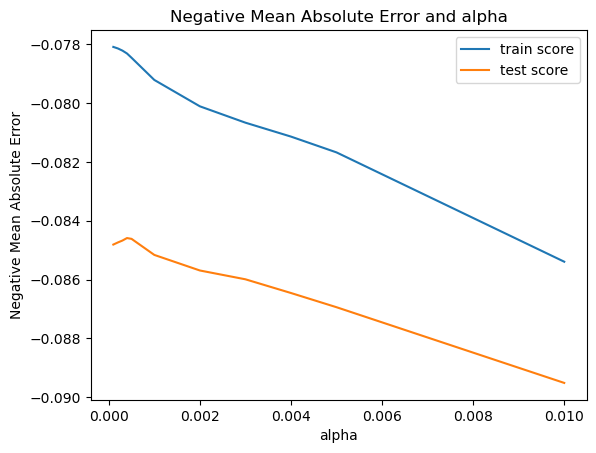

In [56]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0004)

In [58]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00565747,  0.02349241,  0.06912857,  0.04612923,  0.02743656,
       -0.00668992,  0.05168385,  0.10221608,  0.01059301,  0.01207094,
        0.01900858,  0.02333673,  0.03679622,  0.01353577, -0.01205073,
       -0.01985926,  0.01380377,  0.01818347,  0.01796758,  0.01516014,
        0.01657634, -0.01547115,  0.01422691,  0.06830538,  0.0280818 ,
        0.10936038,  0.0775316 ,  0.02391409, -0.0112458 , -0.00603618,
       -0.00774427, -0.00578702,  0.02182976, -0.0143941 , -0.00972554,
        0.01672558, -0.00929101, -0.        ,  0.01109101, -0.03129402,
       -0.02758183,  0.        , -0.01522215,  0.02607171,  0.01651102,
        0.01981743,  0.04358833,  0.01696013,  0.00650843, -0.00904751])

In [59]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013481512842345686

In [60]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0057
1,LotArea,0.0235
2,OverallQual,0.0691
3,OverallCond,0.0461
4,BsmtFinSF1,0.0274
5,BsmtUnfSF,-0.0067
6,TotalBsmtSF,0.0517
7,GrLivArea,0.1022
8,BsmtFullBath,0.0106
9,FullBath,0.0121


In [61]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.0056574658278265525,
 'LotArea': 0.023492410438105005,
 'OverallQual': 0.06912856990199281,
 'OverallCond': 0.04612923190780019,
 'BsmtFinSF1': 0.02743655869179147,
 'BsmtUnfSF': -0.006689921615337911,
 'TotalBsmtSF': 0.051683850418939796,
 'GrLivArea': 0.10221607563406865,
 'BsmtFullBath': 0.010593013047461726,
 'FullBath': 0.012070941705824463,
 'HalfBath': 0.019008577733181313,
 'Fireplaces': 0.02333672928849375,
 'GarageCars': 0.03679622313605112,
 'newGarage': 0.013535768597373423,
 'Remodelled': -0.012050731193864284,
 'BuiltRemodelAge': -0.01985926069110486,
 'd_BsmtQual': 0.013803774021219488,
 'd_BsmtExposure': 0.018183470011605283,
 'd_HeatingQC': 0.0179675778161618,
 'd_KitchenQual': 0.0151601374809882,
 'd_GarageFinish': 0.016576338416535923,
 'd_BldgType': -0.015471153655481799,
 'd_SaleCondition': 0.014226909392685934,
 'MSZoning_FV': 0.06830538220302197,
 'MSZoning_RH': 0.028081804934560462,
 'MSZoning_RL': 0.10936038141480599,
 'MSZoning_RM': 0.0775316

RFE

In [62]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [63]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.109360
5,GrLivArea,True,1,0.102216
12,MSZoning_RM,True,1,0.077532
1,OverallQual,True,1,0.069129
9,MSZoning_FV,True,1,0.068305
4,TotalBsmtSF,True,1,0.051684
2,OverallCond,True,1,0.046129
14,Foundation_PConc,True,1,0.043588
7,GarageCars,True,1,0.036796
10,MSZoning_RH,True,1,0.028082


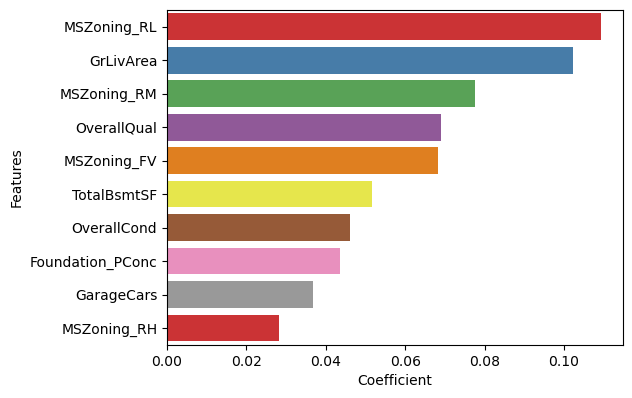

In [64]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

## Conclusion

### The company wants to know:

### Which variables are significant in predicting the price of a house??

Five Most Important Predictor Variables – I will be reviewing the coefficients of the Lasso regression model to determine which five predictor variables have the largest non-zero coefficients. These are the five most important variables in your initial model. 

Below are the coefficient values from my analysis and the top 5 predictor variables are listed below.

MSZoning_RL
GrLivArea
MSZoning_RM
OverallQual
MSZoning_FV

Since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge. 

Based on Lasso, the factors that generally affect the price are:

1. The Zoning classification, 
2. Living area square feet, 
3. Overall quality and condition of the house, 
4. Foundation type of the house, 
5. Number of cars that can be accomodated in the garage, 
6. Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.


### How well those variables describe the price of a house. Also, determine the optimal value of lambda for ridge and lasso regression.

The variables that describe the price of the house are 

1. The optimal lambda value of Ridge and Lasso is as specified below from the model analysis.
Ridge – 6
Lasso – 0.0004
2. The mean squared in case of Ridge and Lasso are from my analysis are.
Ridge – 0.013698622121799814
Lasso - 0.013481512842345686

Please note that, the mean squared value of Lasso lower than that of a Ridge. As per learning below are the techniques.

Consider Ridge Regression when:

If there are many features, and multicollinearity (high correlation between features) is a concern. If we believe that most features are relevant and don't want them to be eliminated entirely and our goal is to reduce overfitting while retaining all features.

Consider Lasso Regression when:

If there are many features, but they look like many of them are irrelevant or redundant. If I want to select a subset of the most important features and eliminate the rest and finally, if I prefer a more interpretable and sparser model.

Lasso helps in feature reduction as the coefficient value of one of the features became 0. Therefore, the variables predicted by Lasso can be applied to choose significant variables for predicting the price of the house. 